In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.getcwd()

'/content'

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
# Define the list of column names
names = [
    "Temp(min)", "Temp(Max)", "Temp(Mean)",
    "Rel_Humid(Min)", "Rel_Humid(Max)", "Rel_Humid(Mea)",
    "Sea_Level_Pressure(Min)", "Sea_Level_Pressure(Max)", "Sea_Level_Pressure(Mean)",
    "precipitation_total", "snowfall_amount", "sunshine_duration",
    "wind_gust(min)", "wind_gust(max)", "wind_gust(mean)",
    "wind_speed(min)", "wind_speed(max)", "wind_speed(mean)"
]
# Convert the list to lowercase
lowercase_names = [name.lower() for name in names]

df = pd.read_csv("ClimateDataBasel.csv", names=lowercase_names)

FileNotFoundError: [Errno 2] No such file or directory: 'ClimateDataBasel.csv'

In [107]:
df

,temp(min),temp(max),temp(mean),rel_humid(min),rel_humid(max),rel_humid(mea),sea_level_pressure(min),sea_level_pressure(max),sea_level_pressure(mean),precipitation_total,snowfall_amount,sunshine_duration,wind_gust(min),wind_gust(max),wind_gust(mean),wind_speed(min),wind_speed(max),wind_speed(mean)
0,8.100529,17.570530,13.445111,61,96,77.875000,1013.1,1018.4,1015.75830,0.2,0.0,350.56274,3.240000,23.400000,12.210002,1.787066,10.403253,6.639939
1,11.110529,18.490528,14.988861,59,94,76.458336,1013.9,1016.6,1014.99170,1.9,0.0,287.23404,6.479999,25.199999,14.880001,4.161301,16.285300,8.616541
2,10.320529,18.170528,14.267612,71,96,83.583336,1015.3,1017.5,1016.38745,0.1,0.0,126.26506,3.240000,24.119999,12.764999,2.028842,11.289829,6.372418
3,10.450529,24.980530,17.309278,54,92,77.625000,1015.9,1018.7,1017.26250,0.0,0.0,881.24710,2.160000,20.160000,9.480000,0.799200,11.483046,4.690738
4,12.350529,25.610529,19.881780,47,88,66.583336,1015.7,1020.7,1018.18353,0.0,0.0,951.56665,0.720000,15.840000,5.565001,0.376746,6.443357,3.311275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,6.160529,10.110529,7.720112,82,94,87.500000,1025.6,1034.7,1028.06240,5.0,0.0,0.00000,9.720000,32.760002,18.974997,3.786256,17.082869,9.509177
1759,1.830529,7.000528,4.553861,53,95,75.625000,1034.7,1040.3,1038.10850,0.0,0.0,502.84442,3.600000,23.039999,16.994999,1.332000,14.241816,8.690425
1760,-0.529471,4.230528,1.380112,40,83,63.291668,1036.7,1039.8,1038.11240,0.0,0.0,489.58572,5.760000,24.840000,17.070000,1.191377,10.290077,5.954996
1761,0.440529,7.760529,3.317195,41,69,53.416668,1032.2,1037.5,1034.68320,0.0,0.0,513.05000,2.160000,25.560000,16.140000,0.266400,7.406686,3.565386


<h3> Analyzing Missing Values</h3>

In [108]:
df.isnull().sum()

temp(min)                   0
temp(max)                   0
temp(mean)                  0
rel_humid(min)              0
rel_humid(max)              0
rel_humid(mea)              0
sea_level_pressure(min)     0
sea_level_pressure(max)     0
sea_level_pressure(mean)    0
precipitation_total         0
snowfall_amount             0
sunshine_duration           0
wind_gust(min)              0
wind_gust(max)              0
wind_gust(mean)             0
wind_speed(min)             0
wind_speed(max)             0
wind_speed(mean)            0
dtype: int64

No missing values so we move to distribution analysis

<h3> Analyzing Distribution of Columns for EDA </h3>

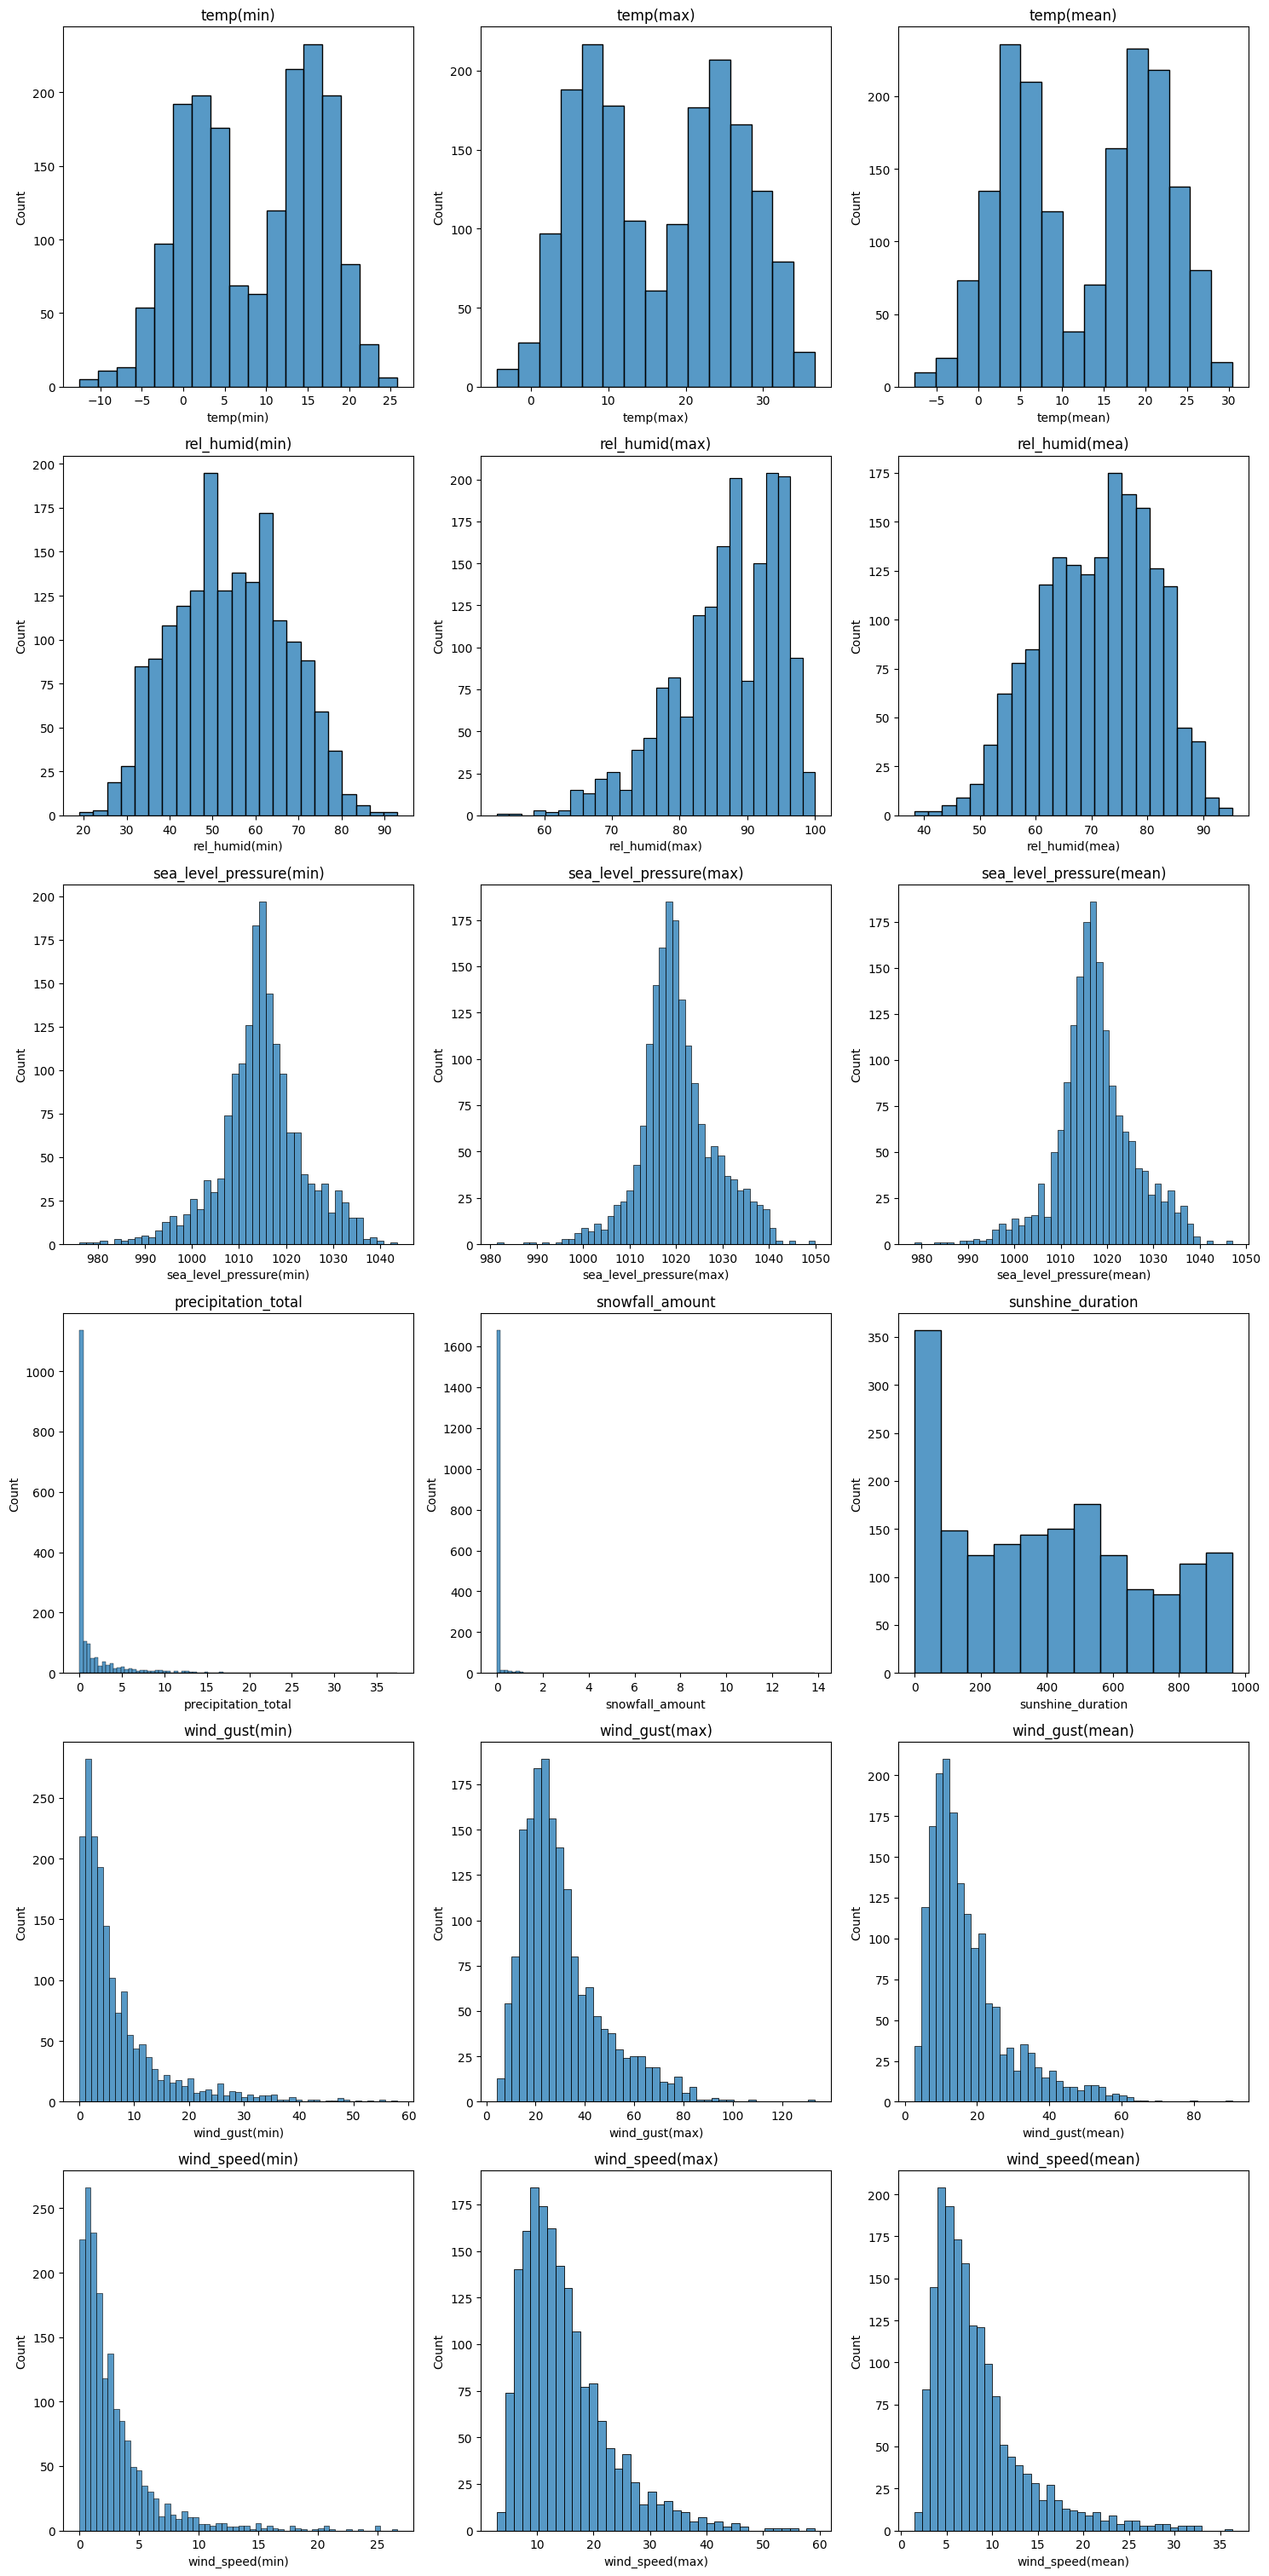

In [109]:
plt.figure(figsize=(5*3, 5*9))   # width x height

rows = 9
cols = 3

for i, col in enumerate(df.columns, 1):   # start index at 1
    plt.subplot(rows, cols, i)
    sns.histplot(x=df[col])
    plt.title(f'{col}')

plt.tight_layout()
plt.show()


First we look for any outliers

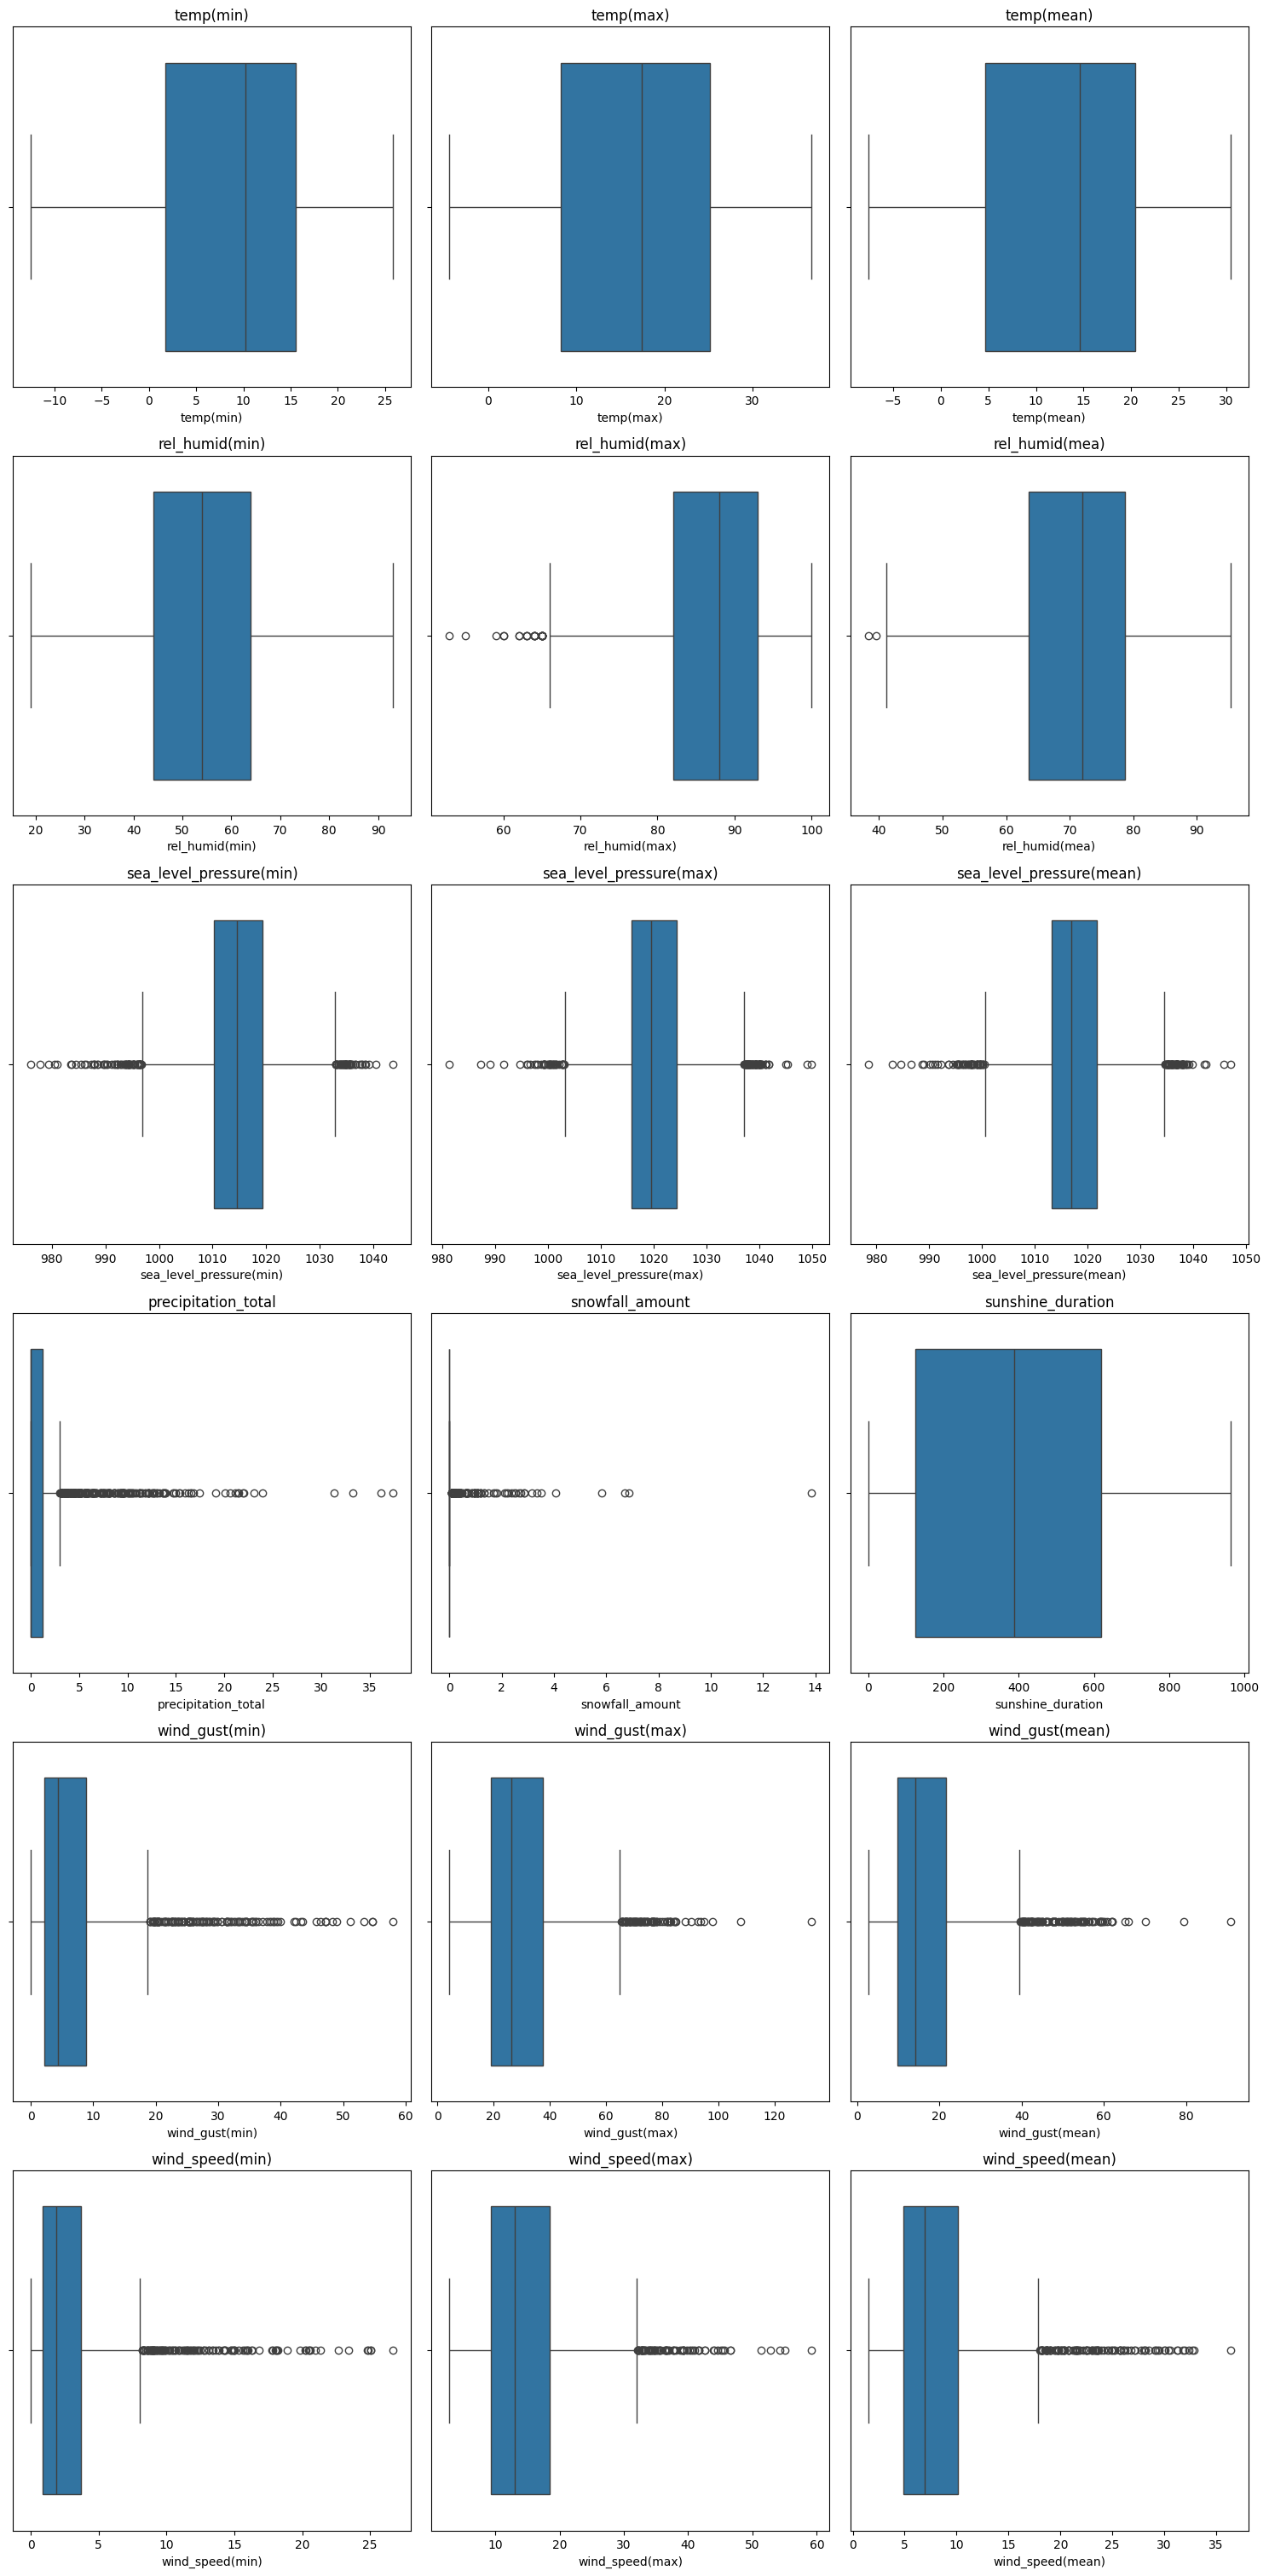

In [110]:
#Box Plots for outliers
plt.figure(figsize=(5*3, 5*9)) 

for i, col in enumerate(df.columns, 1):   # start index at 1
    plt.subplot(rows, cols, i)
    sns.boxplot(x=df[col])
    plt.title(f'{col}')

plt.tight_layout()
plt.show()

Counts of outliers in the dataset

In [111]:
outlier_counts = {}
outlier_percentage ={}

for col in df.columns:
    # Drop non-numeric columns automatically
    if not pd.api.types.is_numeric_dtype(df[col]):
        continue
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Count outliers
    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    outlier_counts[col] = outliers.count()
    outlier_percentage[col] = len(outliers) / len(df[col]) * 100

outlier_counts
outlier_percentage

{'temp(min)': 0.0,
 'temp(max)': 0.0,
 'temp(mean)': 0.0,
 'rel_humid(min)': 0.0,
 'rel_humid(max)': 1.4180374361883155,
 'rel_humid(mea)': 0.11344299489506524,
 'sea_level_pressure(min)': 6.1826432217810545,
 'sea_level_pressure(max)': 5.501985252410663,
 'sea_level_pressure(mean)': 6.1826432217810545,
 'precipitation_total': 15.314804310833807,
 'snowfall_amount': 6.2960862166761205,
 'sunshine_duration': 0.0,
 'wind_gust(min)': 8.508224617129892,
 'wind_gust(max)': 4.934770277935337,
 'wind_gust(mean)': 6.125921724333523,
 'wind_speed(min)': 6.920022688598978,
 'wind_speed(max)': 4.310833806012479,
 'wind_speed(mean)': 6.125921724333523}

In [112]:
#get column names with outliers
outlier_col = [key for key,value in outlier_counts.items() if value >0]
outlier_col

['rel_humid(max)',
 'rel_humid(mea)',
 'sea_level_pressure(min)',
 'sea_level_pressure(max)',
 'sea_level_pressure(mean)',
 'precipitation_total',
 'snowfall_amount',
 'wind_gust(min)',
 'wind_gust(max)',
 'wind_gust(mean)',
 'wind_speed(min)',
 'wind_speed(max)',
 'wind_speed(mean)']

<h2> Handling Outliers </h2>

Method 1: Capping Outliers with the Max and Min Value

In [113]:
df_capped = df.copy()

for col in outlier_col:
    Q1 = df_capped[col].quantile(0.25)
    Q3 = df_capped[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df_capped.loc[df_capped[col] > upper, col] = upper
    df_capped.loc[df_capped[col] < lower, col] = lower


C:\Users\OMNI BOOK\AppData\Local\Temp\ipykernel_28740\1832201128.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '109.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_capped.loc[df_capped[col] > upper, col] = upper


Checking Distribution again

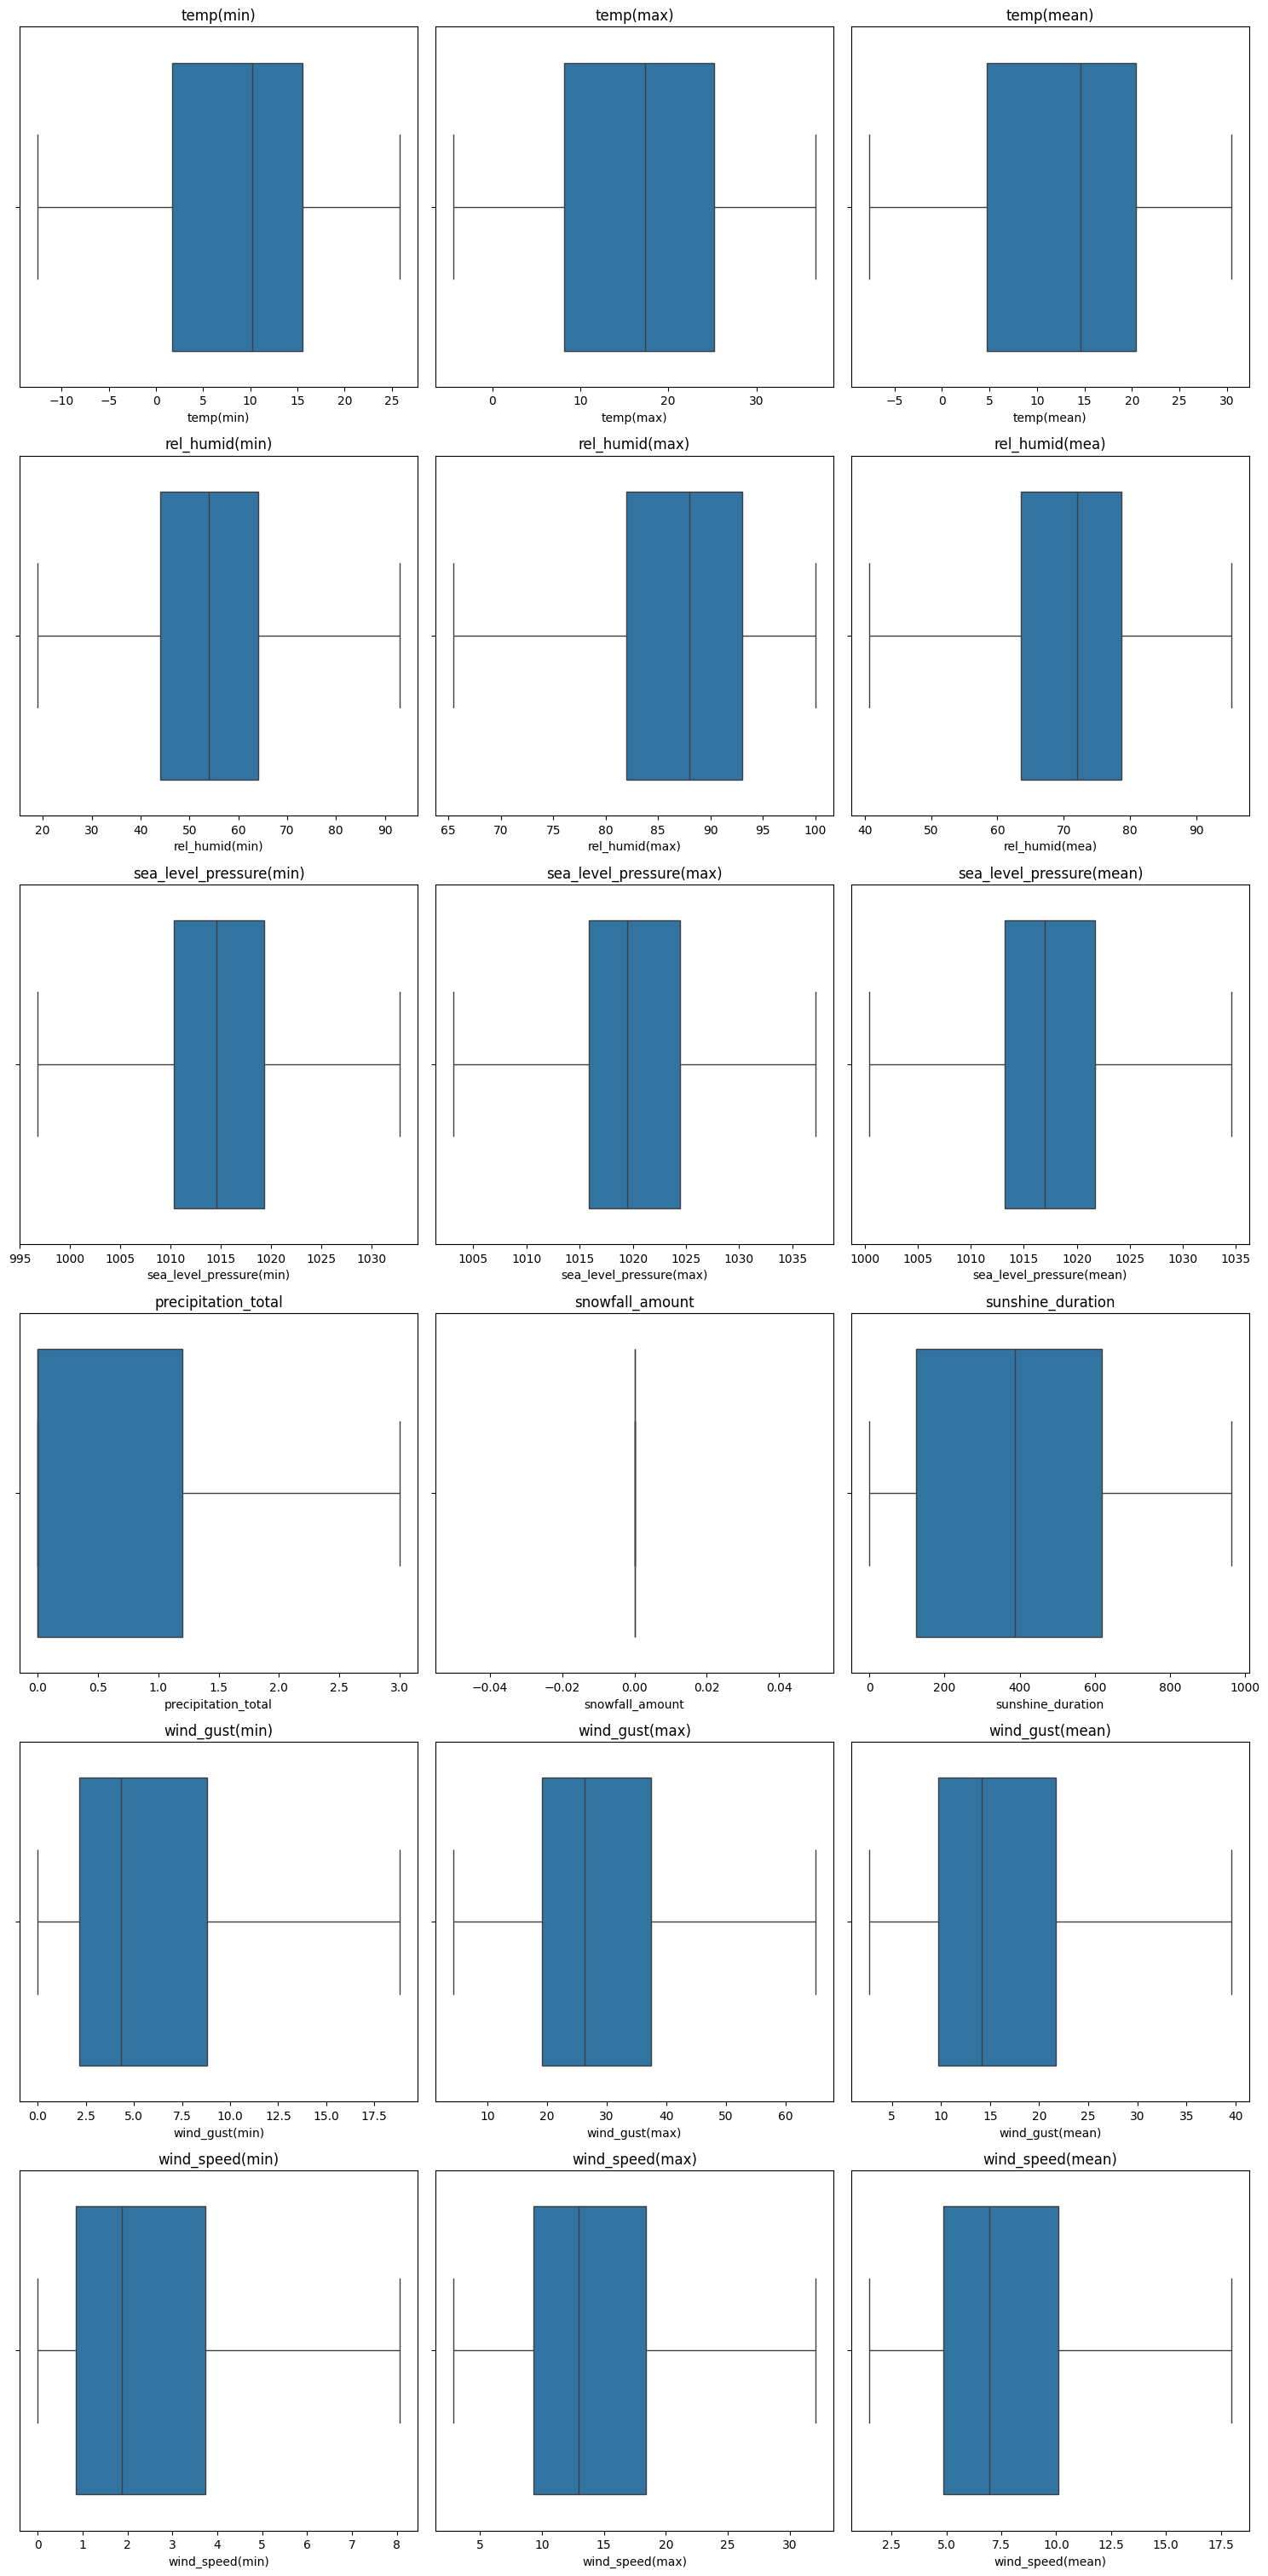

In [114]:
#Box Plots for outliers
plt.figure(figsize=(5*3, 5*9)) 

rows = 9
cols = 3

for i, col in enumerate(df_capped.columns, 1):   # start index at 1
    plt.subplot(rows, cols, i)
    sns.boxplot(x=df_capped[col])
    plt.title(f'{col}')

plt.tight_layout()
plt.show()

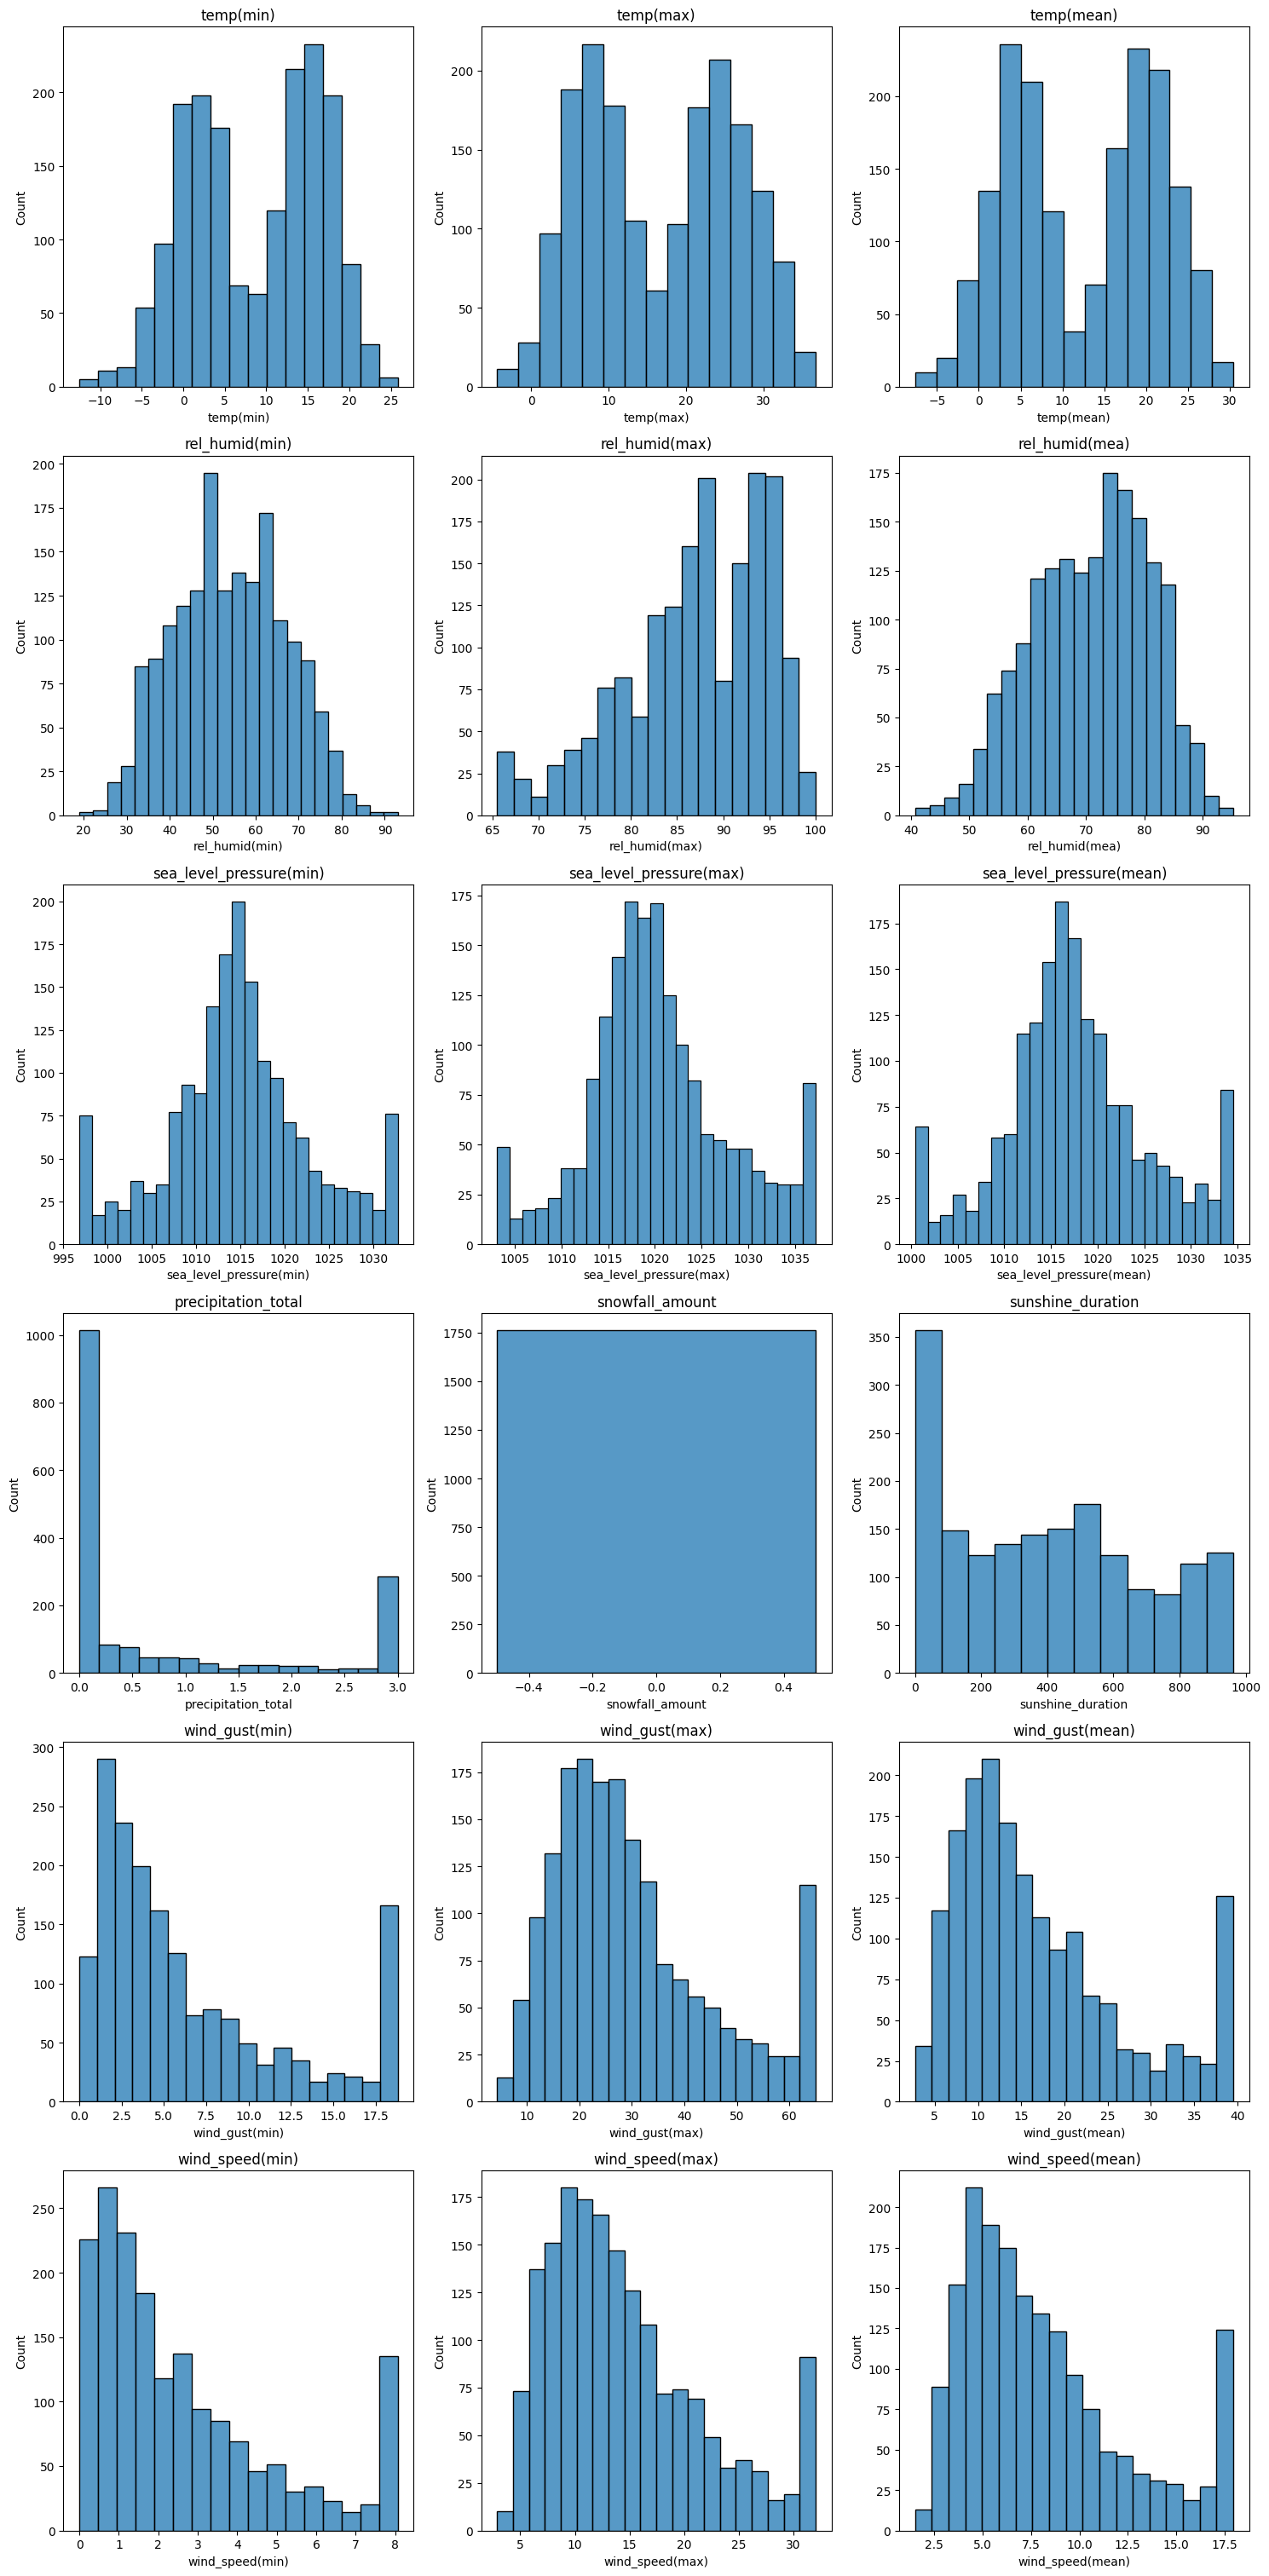

In [115]:
#Box Plots for outliers
plt.figure(figsize=(5*3, 5*9)) 

rows = 9
cols = 3

for i, col in enumerate(df_capped.columns, 1):   # start index at 1
    plt.subplot(rows, cols, i)
    sns.histplot(x=df_capped[col])
    plt.title(f'{col}')

plt.tight_layout()
plt.show()

<h3>Standardization to make the data into a standard distribution 

In [116]:
from sklearn.preprocessing import StandardScaler

In [117]:
scaler = StandardScaler()
df_scaled = scaler.fit(df_capped)
print(scaler.mean_)
df_scaled=scaler.transform(df_capped)

[8.73877619e+00 1.67792982e+01 1.27173499e+01 5.40924560e+01
 8.70428247e+01 7.10425057e+01 1.01481526e+03 1.02038108e+03
 1.01763518e+03 7.62847423e-01 0.00000000e+00 3.99168240e+02
 6.35268282e+00 2.99338054e+01 1.69427761e+01 2.58992598e+00
 1.45912957e+01 8.08550437e+00]


In [118]:
df_scaled = pd.DataFrame(df_scaled, columns=df_capped.columns)

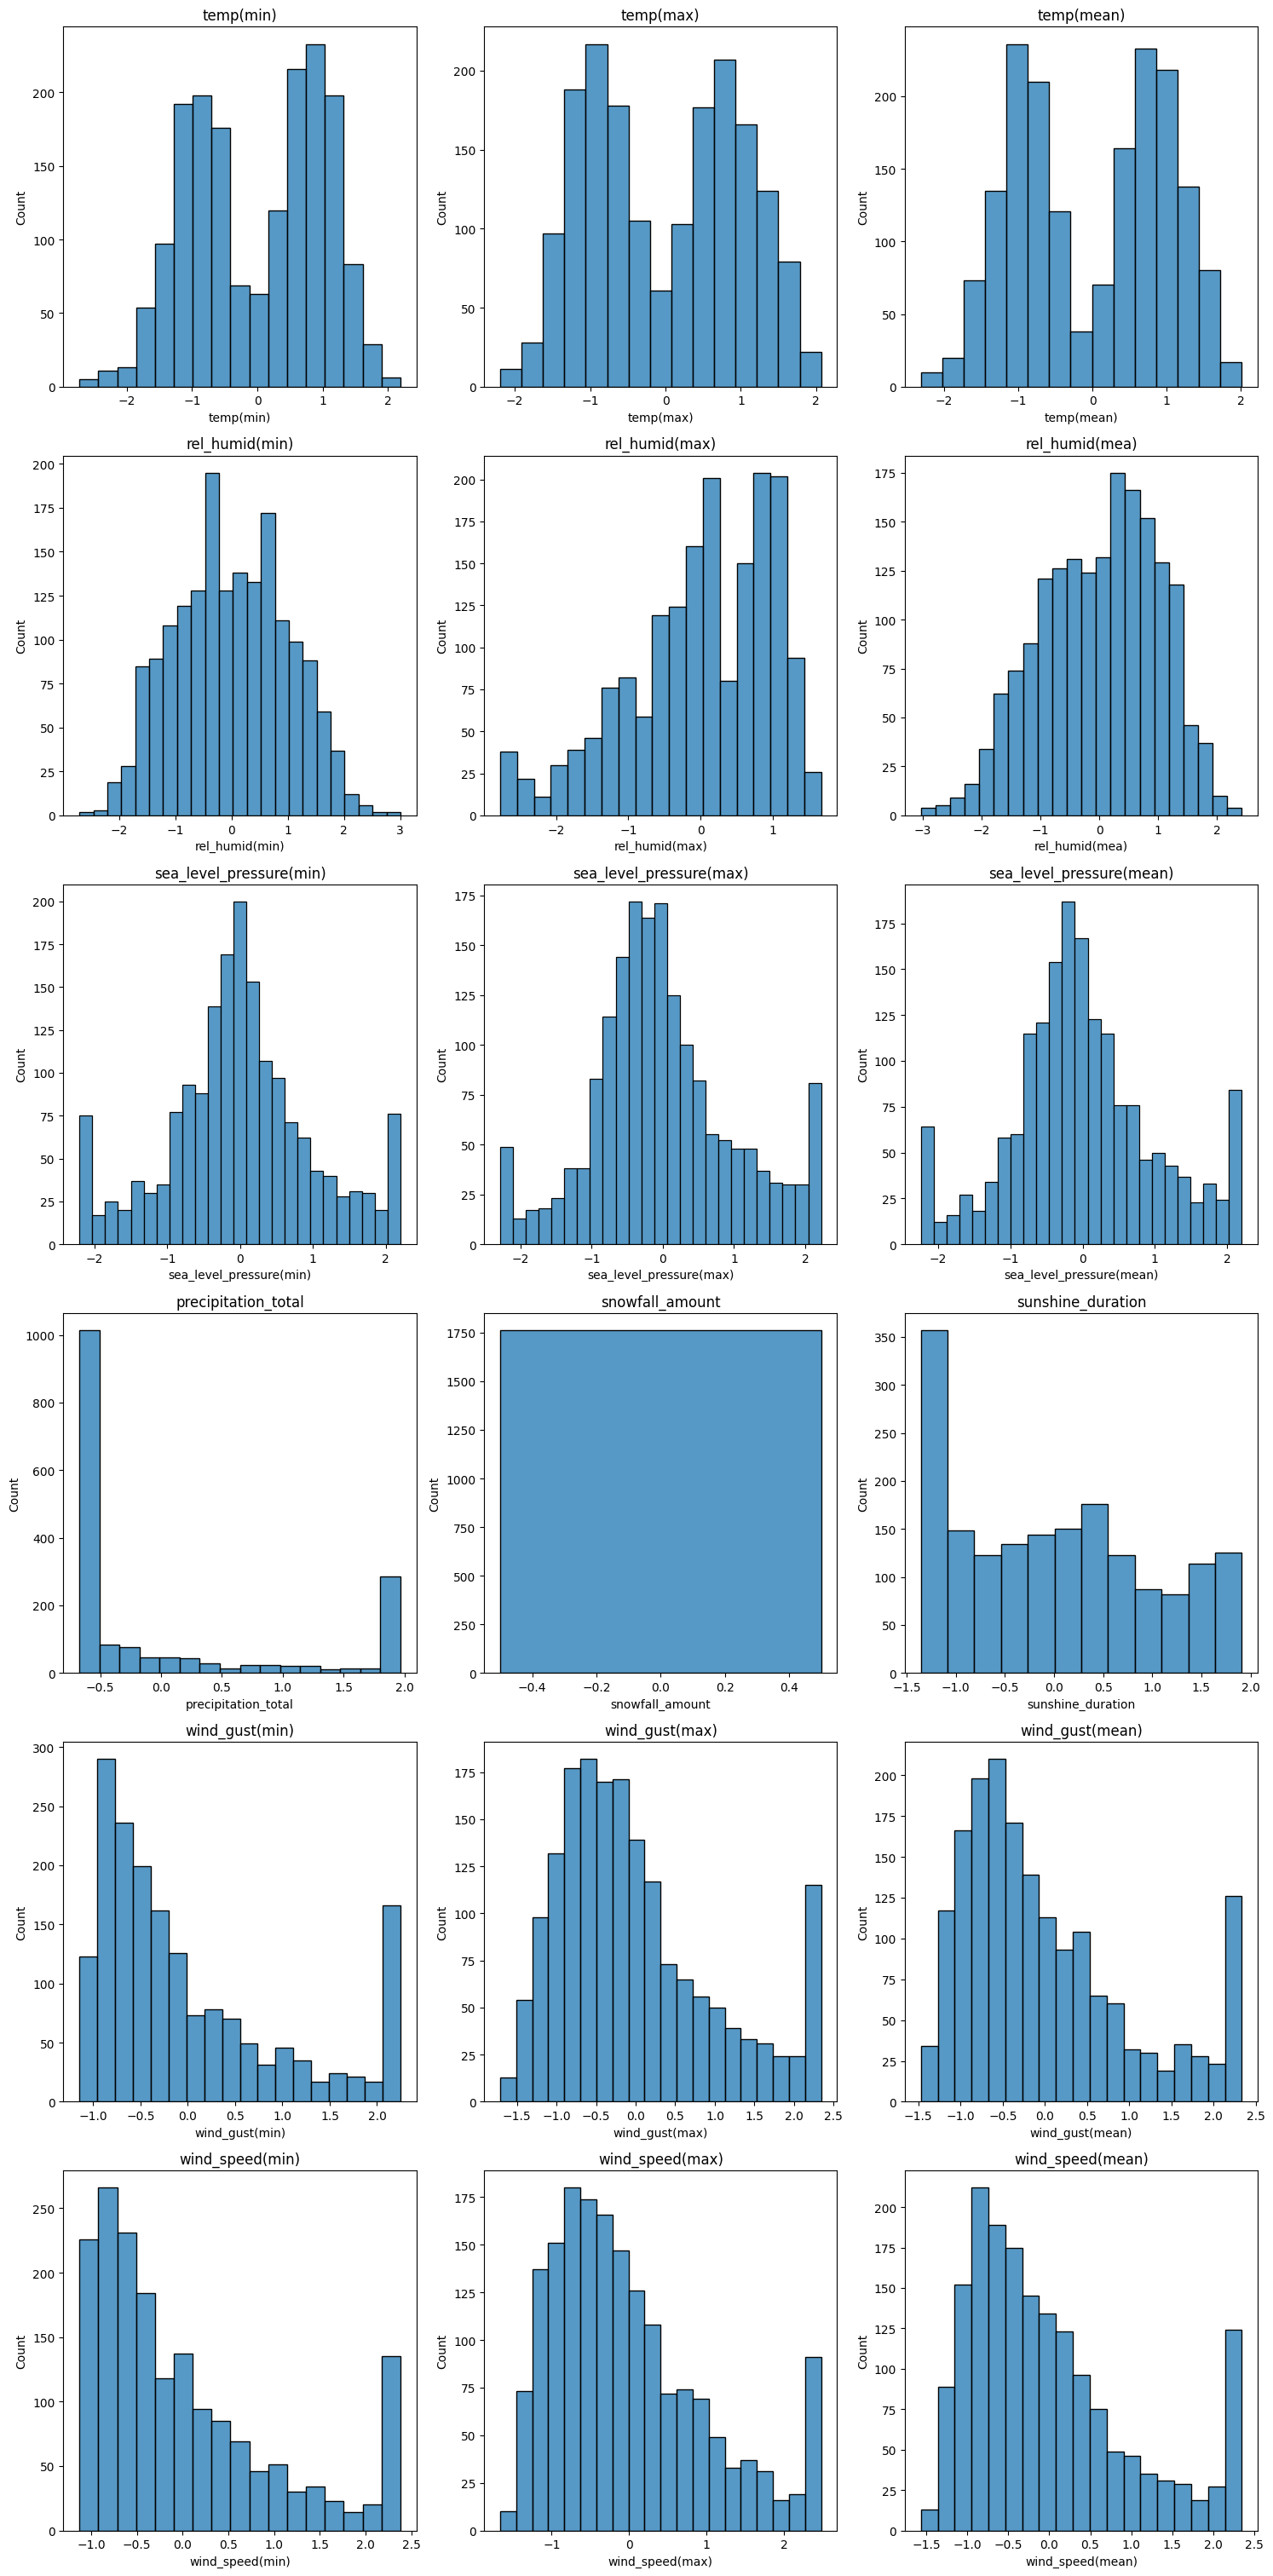

In [119]:
#Box Plots for outliers
plt.figure(figsize=(5*3, 5*9)) 

rows = 9
cols = 3

for i, col in enumerate(df_scaled.columns, 1):   # start index at 1
    plt.subplot(rows, cols, i)
    sns.histplot(x=df_scaled[col])
    plt.title(f'{col}')

plt.tight_layout()
plt.show()

In [120]:
from sklearn import preprocessing

df_scaled2 = preprocessing.normalize(df_capped)

In [121]:
df_scaled2 = pd.DataFrame(df_scaled, columns=df_capped.columns)

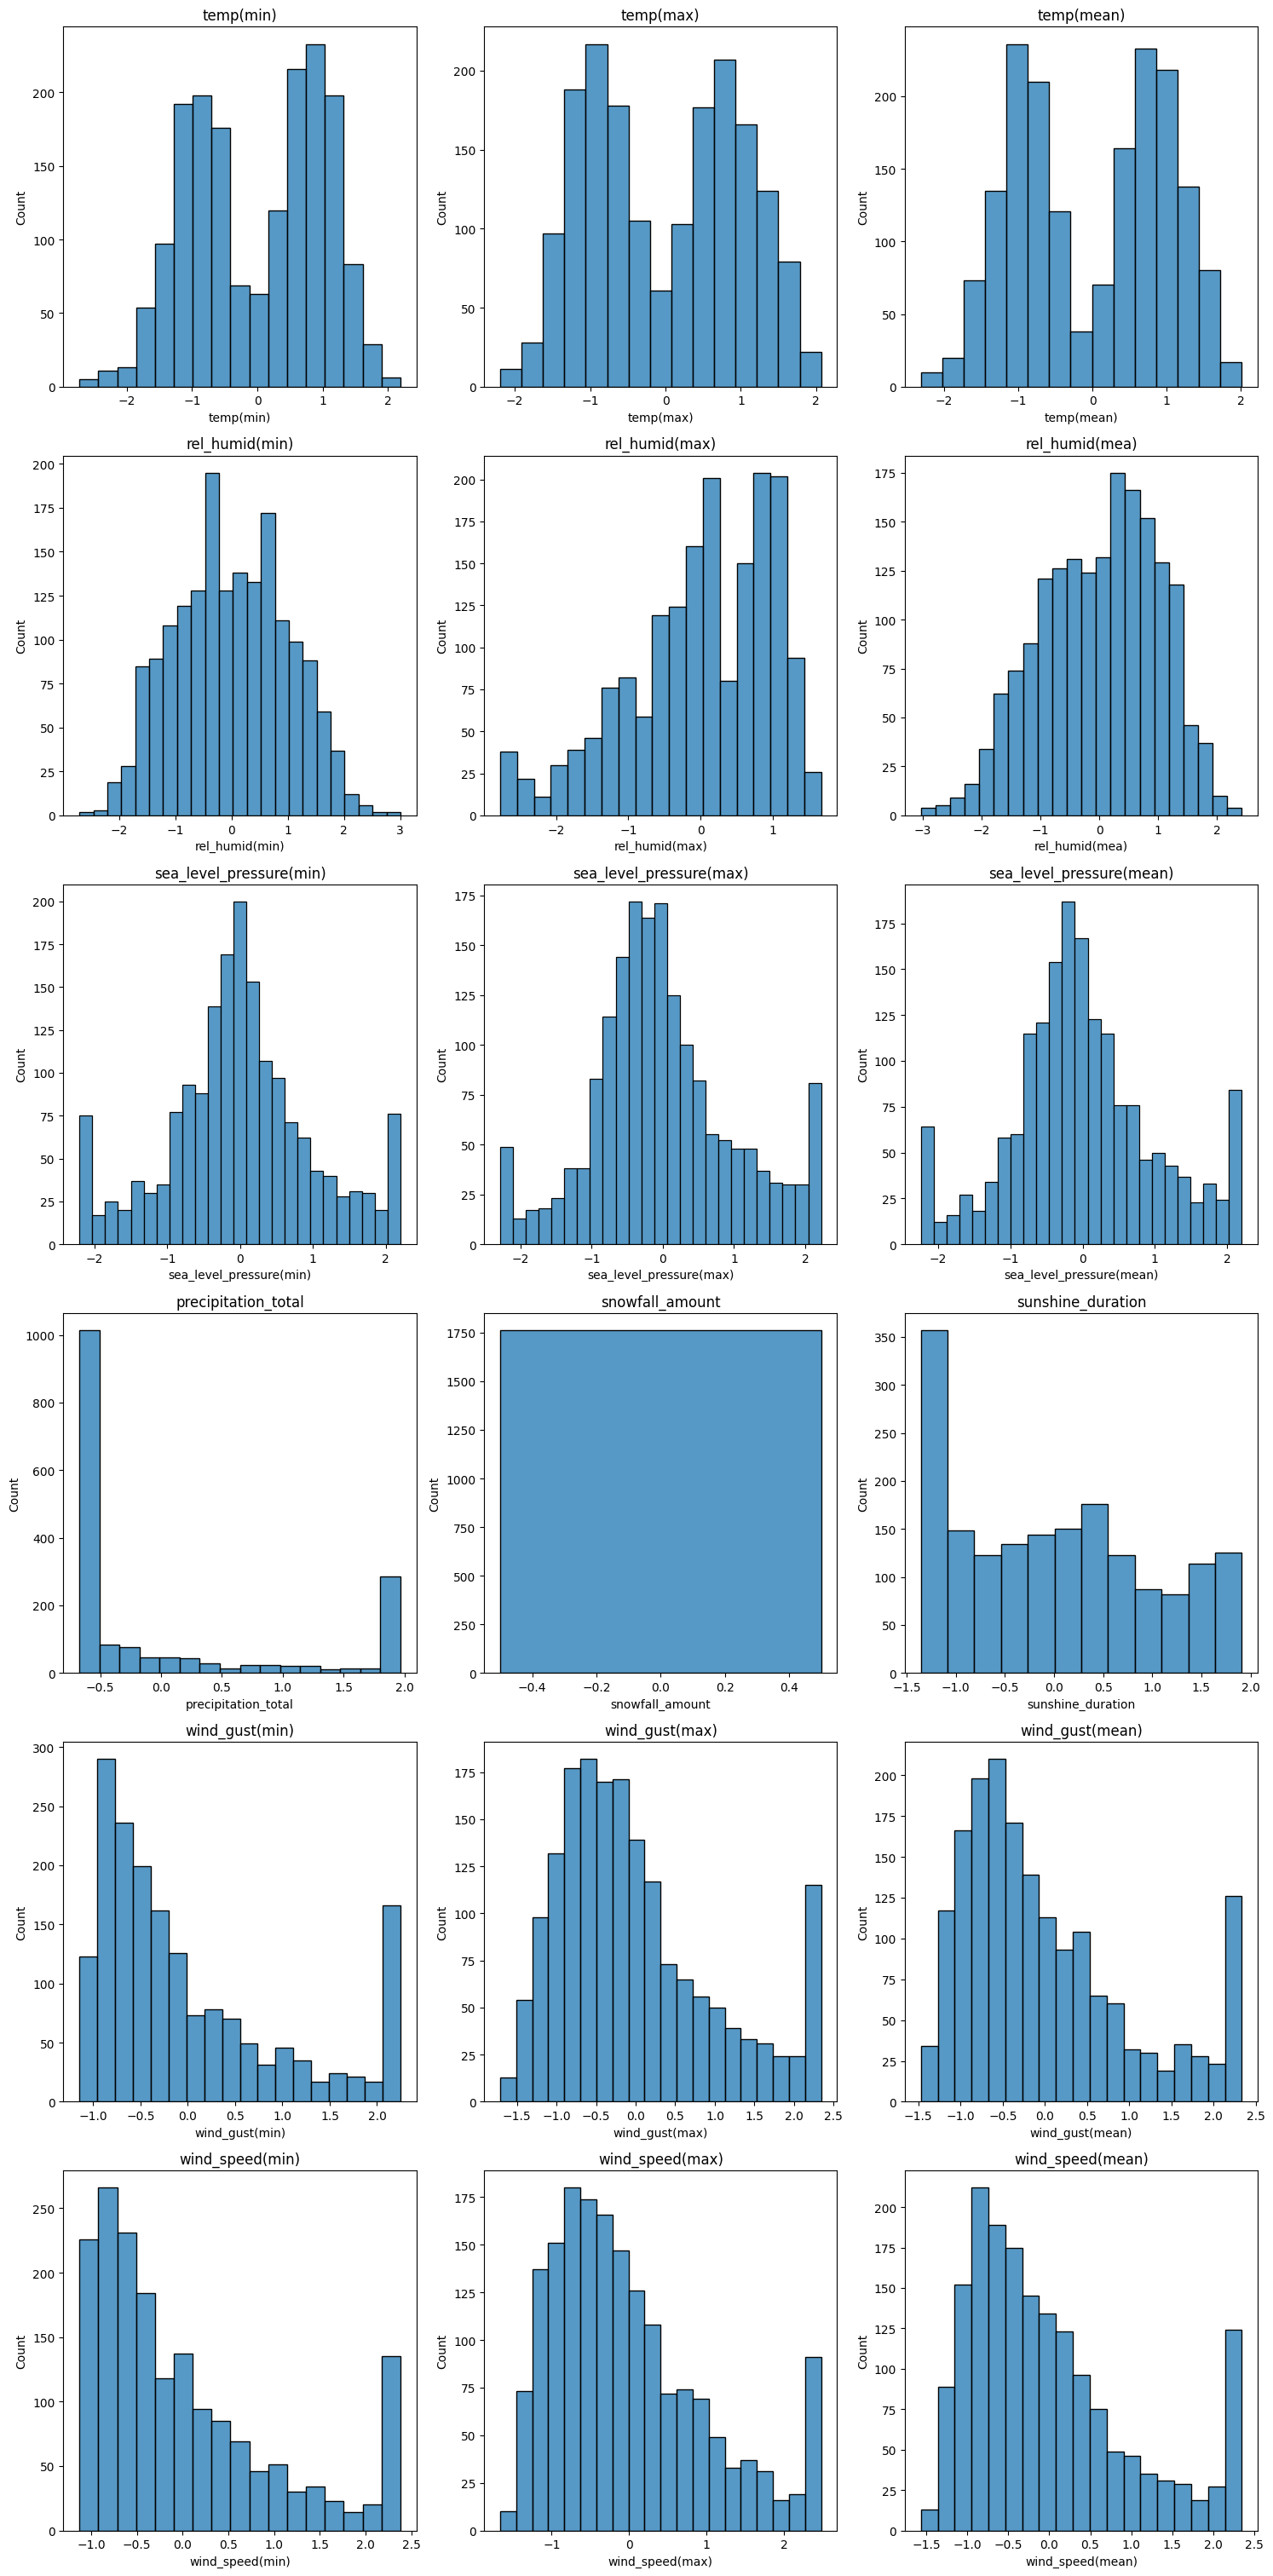

In [123]:
#Box Plots for outliers
plt.figure(figsize=(5*3, 5*9)) 

rows = 9
cols = 3

for i, col in enumerate(df_scaled2.columns, 1):   # start index at 1
    plt.subplot(rows, cols, i)
    sns.histplot(x=df_scaled2[col])
    plt.title(f'{col}')

plt.tight_layout()
plt.show()